# Analysis

### Request the ohsome API

Question: How many buildings were mapped with RapID (Microsoft buildings) in every country?

#### Import libs

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Get the data for required region

In [ ]:
base_url = "https://api.ohsome.org/v1"
endpoint = "/elements/count/groupBy/boundary/groupBy/tag"
url = base_url + endpoint

with open(f"test_countries.geojson", "r") as file:
    bpolys = json.load(file)

parameters = {
    "bpolys": json.dumps(bpolys),  # pass GeoJSON as string.
    "filter": "building=* and building!=no and geometry:polygon",
    "groupByKey": "source",
    "groupByValues": "microsoft/BuildingFootprints",
    "format": "json",
    "time": "2018-01-01/2023-01-01/P1Y",
}
headers = {
    "accept": "application/json",
    "Content-Type": "application/x-www-form-urlencoded",
}

for value in parameters.values():
    assert value != "", "Please provide values for the parameters"

response = requests.post(url, data=parameters, headers=headers)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

print("Response:")
print(json.dumps(response.json(), indent=4))  # Pretty print response

result = response.json()['groupByResult']


Response:
{
    "attribution": {
        "url": "https://ohsome.org/copyrights",
        "text": "\u00a9 OpenStreetMap contributors"
    },
    "apiVersion": "1.9.0",
    "groupByResult": [
        {
            "groupByObject": [
                "feature1",
                "remainder"
            ],
            "result": [
                {
                    "timestamp": "2020-01-01T00:00:00Z",
                    "value": 395155.0
                },
                {
                    "timestamp": "2021-01-01T00:00:00Z",
                    "value": 470680.0
                },
                {
                    "timestamp": "2022-01-01T00:00:00Z",
                    "value": 629701.0
                },
                {
                    "timestamp": "2023-01-01T00:00:00Z",
                    "value": 753591.0
                }
            ]
        },
        {
            "groupByObject": [
                "feature1",
                "source=microsoft/BuildingFootprints"

### Get the data for every continent

#### Define the url

In [ ]:
base_url = "https://api.ohsome.org/v1"
endpoint = "/elements/count/groupBy/boundary/groupBy/tag"
url = base_url + endpoint

#### Define the function to generate the data

In [ ]:
def data_gen(name):

    with open(f"{geojson_dir}{name}", "r") as file:
        bpolys = json.load(file)


    parameters = {
        "bpolys": json.dumps(bpolys),  # pass GeoJSON as string.
        "filter": "building=* and building!=no and geometry:polygon",
        "groupByKey": "source",
        "groupByValues": "microsoft/BuildingFootprints",
        "format": "json",
        "time": "2018-01-01/2023-01-01/P1Y",
    }
    headers = {
        "accept": "application/json",
        "Content-Type": "application/x-www-form-urlencoded",
    }

    for value in parameters.values():
        assert value != "", "Please provide values for the parameters"

    response = requests.post(url, data=parameters, headers=headers)
    response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

    print("Response:")
    print(json.dumps(response.json(), indent=4))  # Pretty print response

    result = response.json()["groupByResult"]
    return result


#### Get the names of regions/geojson files

In [ ]:
os.chdir('..')
home_dir = os.getcwd()
geojson_dir = os.path.join(home_dir, "geojson-continent-files", "")

geojson_names = []
for (dir_path, dir_names, file_names) in os.walk(geojson_dir):  # give the path
    geojson_names.extend(file_names)
print(geojson_names)
print(os.getcwd())


['Africa.geojson', 'Antarctica.geojson', 'Asia.geojson', 'Australia.geojson', 'Europe.geojson', 'North America.geojson', 'Oceania.geojson', 'South America.geojson']
c:\Users\milan\OneDrive - MUNI\VŠ\PhD\Zahraniční stáž\Work\HeiGIT_notebooks\analysis\ai-assisted-osm-mapping-stats


#### Get the required data by the geojson files (not overhelm the server)

In [ ]:
os.chdir(geojson_dir) # change the working directory because of geojson files

data = []

for geojson_name in geojson_names:

    data.append(data_gen(geojson_name))

os.chdir(home_dir)  # change the working directory back to the home directory


Response:
{
    "attribution": {
        "url": "https://ohsome.org/copyrights",
        "text": "\u00a9 OpenStreetMap contributors"
    },
    "apiVersion": "1.9.0",
    "groupByResult": [
        {
            "groupByObject": [
                0,
                "remainder"
            ],
            "result": [
                {
                    "timestamp": "2018-01-01T00:00:00Z",
                    "value": 29449360.0
                },
                {
                    "timestamp": "2019-01-01T00:00:00Z",
                    "value": 44240256.0
                },
                {
                    "timestamp": "2020-01-01T00:00:00Z",
                    "value": 54298403.0
                },
                {
                    "timestamp": "2021-01-01T00:00:00Z",
                    "value": 67423672.0
                },
                {
                    "timestamp": "2022-01-01T00:00:00Z",
                    "value": 80187816.0
                },
             

In [ ]:
downloaded_data = r"downloaded-data"
with open(f"{downloaded_data}\continents_data_18-23_ai.json", "w") as file:
    json.dump(data, file, indent=4)

# Plot figure 1

#### Load the data

In [2]:
os.chdir('..')
home_dir = os.getcwd()
downloaded_data = r"downloaded-data"


In [50]:
with open(f"{downloaded_data}\continents_data_18-23_ai.json", "r") as f:
    data = json.load(f)
data


[[{'groupByObject': [0, 'remainder'],
   'result': [{'timestamp': '2018-01-01T00:00:00Z', 'value': 29449360.0},
    {'timestamp': '2019-01-01T00:00:00Z', 'value': 44240256.0},
    {'timestamp': '2020-01-01T00:00:00Z', 'value': 54298403.0},
    {'timestamp': '2021-01-01T00:00:00Z', 'value': 67423672.0},
    {'timestamp': '2022-01-01T00:00:00Z', 'value': 80187816.0},
    {'timestamp': '2023-01-01T00:00:00Z', 'value': 92934713.0}]},
  {'groupByObject': [0, 'source=microsoft/BuildingFootprints'],
   'result': [{'timestamp': '2018-01-01T00:00:00Z', 'value': 0.0},
    {'timestamp': '2019-01-01T00:00:00Z', 'value': 0.0},
    {'timestamp': '2020-01-01T00:00:00Z', 'value': 0.0},
    {'timestamp': '2021-01-01T00:00:00Z', 'value': 219212.0},
    {'timestamp': '2022-01-01T00:00:00Z', 'value': 269849.0},
    {'timestamp': '2023-01-01T00:00:00Z', 'value': 2598077.0}]}],
 [{'groupByObject': [6, 'remainder'],
   'result': [{'timestamp': '2018-01-01T00:00:00Z', 'value': 606.0},
    {'timestamp': '2019-

#### Edit the obtained data into desired shape to create a DataFrame

In [51]:
d = {
    "feature": [],
    "source": [],
    "timestamp": [],
    "value": []
}


In [52]:
for cont in data:
    for dic1 in cont:
        feature, source = dic1["groupByObject"][0], dic1["groupByObject"][1]
        for res in dic1["result"]:
            d["feature"].append(feature)
            d["source"].append(source)
            d["timestamp"].append(res["timestamp"])
            d["value"].append(res["value"])

df = pd.DataFrame(d)
df

,feature,source,timestamp,value
0,0,remainder,2018-01-01T00:00:00Z,29449360.0
1,0,remainder,2019-01-01T00:00:00Z,44240256.0
2,0,remainder,2020-01-01T00:00:00Z,54298403.0
3,0,remainder,2021-01-01T00:00:00Z,67423672.0
4,0,remainder,2022-01-01T00:00:00Z,80187816.0
...,...,...,...,...
91,5,source=microsoft/BuildingFootprints,2019-01-01T00:00:00Z,0.0
92,5,source=microsoft/BuildingFootprints,2020-01-01T00:00:00Z,0.0
93,5,source=microsoft/BuildingFootprints,2021-01-01T00:00:00Z,0.0
94,5,source=microsoft/BuildingFootprints,2022-01-01T00:00:00Z,12590.0


In [53]:
# Export the data to excel
# df.to_excel("example.xlsx", index=False)

In [54]:
df["year"] = pd.to_datetime(df["timestamp"]).dt.year

## Plot the results

#### Data preparation and filtering

In [55]:
# labels for graph legend
labels_dic = {0:"Africa",
            1:"Asia",
            2:"Australia",
            3:"North America",
            4:"Oceania",
            5:"South America",
            6:"Antarctica",
            7:"Europe",
            }
ser_labels = pd.Series(labels_dic, name="continent" )
# print(ser_labels)

df_labels = pd.DataFrame({"continent": ser_labels, "id": range(len(ser_labels))})
print(df_labels)

df = df.merge(df_labels, how="left", left_on="feature", right_on="id")
df

       continent  id
0         Africa   0
1           Asia   1
2      Australia   2
3  North America   3
4        Oceania   4
5  South America   5
6     Antarctica   6
7         Europe   7


,feature,source,timestamp,value,year,continent,id
0,0,remainder,2018-01-01T00:00:00Z,29449360.0,2018,Africa,0
1,0,remainder,2019-01-01T00:00:00Z,44240256.0,2019,Africa,0
2,0,remainder,2020-01-01T00:00:00Z,54298403.0,2020,Africa,0
3,0,remainder,2021-01-01T00:00:00Z,67423672.0,2021,Africa,0
4,0,remainder,2022-01-01T00:00:00Z,80187816.0,2022,Africa,0
...,...,...,...,...,...,...,...
91,5,source=microsoft/BuildingFootprints,2019-01-01T00:00:00Z,0.0,2019,South America,5
92,5,source=microsoft/BuildingFootprints,2020-01-01T00:00:00Z,0.0,2020,South America,5
93,5,source=microsoft/BuildingFootprints,2021-01-01T00:00:00Z,0.0,2021,South America,5
94,5,source=microsoft/BuildingFootprints,2022-01-01T00:00:00Z,12590.0,2022,South America,5


In [56]:
# grouped = df.groupby(["feature", "timestamp"])["value"].sum()
grouped = df.groupby(["source", "year"])["value"].sum()
grouped


source                               year
remainder                            2018    258151878.0
                                     2019    320167900.0
                                     2020    364680591.0
                                     2021    418092103.0
                                     2022    472865820.0
                                     2023    517941468.0
source=microsoft/BuildingFootprints  2018            0.0
                                     2019            0.0
                                     2020        13935.0
                                     2021      2530556.0
                                     2022      5859157.0
                                     2023     12412360.0
Name: value, dtype: float64

In [57]:

# merged_data = df.merge(grouped, on=['timestamp', 'feature'], how='left', )
merged_data = df.merge(grouped, on=["source", 'year'], how='left', )
merged_data = merged_data.rename(columns={"value_x":"num_of_blds", "value_y":"total_blds"})
merged_data["percentage"] = (merged_data["num_of_blds"] / merged_data["total_blds"]) * 100
merged_data.head(10)


,feature,source,timestamp,num_of_blds,year,continent,id,total_blds,percentage
0,0,remainder,2018-01-01T00:00:00Z,29449360.0,2018,Africa,0,258151878.0,11.407765
1,0,remainder,2019-01-01T00:00:00Z,44240256.0,2019,Africa,0,320167900.0,13.817830
2,0,remainder,2020-01-01T00:00:00Z,54298403.0,2020,Africa,0,364680591.0,14.889304
3,0,remainder,2021-01-01T00:00:00Z,67423672.0,2021,Africa,0,418092103.0,16.126512
4,0,remainder,2022-01-01T00:00:00Z,80187816.0,2022,Africa,0,472865820.0,16.957837
5,0,remainder,2023-01-01T00:00:00Z,92934713.0,2023,Africa,0,517941468.0,17.943092
6,0,source=microsoft/BuildingFootprints,2018-01-01T00:00:00Z,0.0,2018,Africa,0,0.0,NaN
7,0,source=microsoft/BuildingFootprints,2019-01-01T00:00:00Z,0.0,2019,Africa,0,0.0,NaN
8,0,source=microsoft/BuildingFootprints,2020-01-01T00:00:00Z,0.0,2020,Africa,0,13935.0,0.000000
9,0,source=microsoft/BuildingFootprints,2021-01-01T00:00:00Z,219212.0,2021,Africa,0,2530556.0,8.662602


In [58]:
# percentage verification
merged_data.groupby(["source", "year"])["percentage"].sum()


source                               year
remainder                            2018    100.0
                                     2019    100.0
                                     2020    100.0
                                     2021    100.0
                                     2022    100.0
                                     2023    100.0
source=microsoft/BuildingFootprints  2018      0.0
                                     2019      0.0
                                     2020    100.0
                                     2021    100.0
                                     2022    100.0
                                     2023    100.0
Name: percentage, dtype: float64

In [65]:
df_ai = merged_data.loc[(df["source"] == "source=microsoft/BuildingFootprints") , :] # buiildings used from Microsoft AI
# df_ai #& (df["feature"] == 5)
df_rem = merged_data.loc[(df["source"] == "remainder"),:] # remainder = manually mapped buildings
df_ai.head()


,feature,source,timestamp,num_of_blds,year,continent,id,total_blds,percentage
6,0,source=microsoft/BuildingFootprints,2018-01-01T00:00:00Z,0.0,2018,Africa,0,0.0,NaN
7,0,source=microsoft/BuildingFootprints,2019-01-01T00:00:00Z,0.0,2019,Africa,0,0.0,NaN
8,0,source=microsoft/BuildingFootprints,2020-01-01T00:00:00Z,0.0,2020,Africa,0,13935.0,0.000000
9,0,source=microsoft/BuildingFootprints,2021-01-01T00:00:00Z,219212.0,2021,Africa,0,2530556.0,8.662602
10,0,source=microsoft/BuildingFootprints,2022-01-01T00:00:00Z,269849.0,2022,Africa,0,5859157.0,4.605594


#### Plots

In [60]:
def fill_under_lines(*argv, alpha=.2, **kwargs):
    for ax in argv:
        if ax is None:
            ax = plt.gca()
        for line in ax.lines:
            x, y = line.get_xydata().T
            ax.fill_between(x, 0, y, color=line.get_color(), alpha=alpha, **kwargs)

Text(0, 0.5, 'Number of buildings')

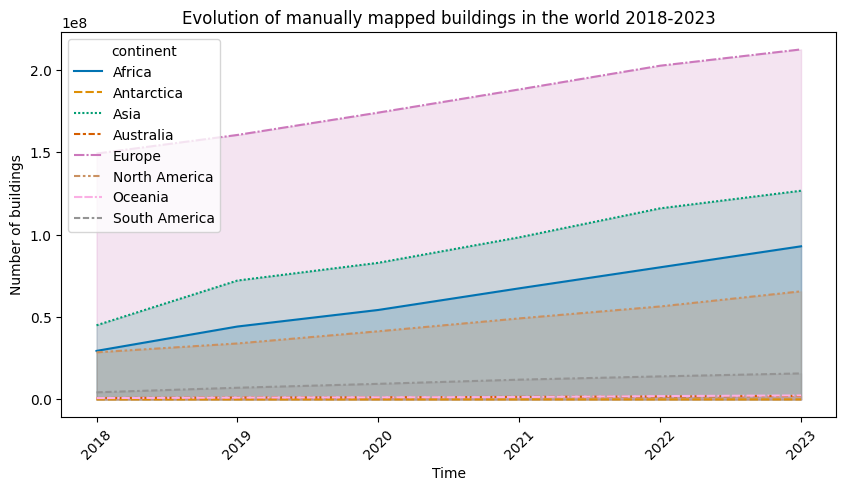

In [61]:
# without dictionary labels

plt.figure(figsize=(10, 5))
plt.title("Evolution of manually mapped buildings in the world 2018-2023")

# plot the data
ax = sns.lineplot(x='year', y='num_of_blds', hue='continent', data=df_rem,
             palette='colorblind',  style='continent',
                  )
# log y axis
# plt.yscale("log")

# rotate x labels
plt.xticks(rotation=45)
# plt.ylim(top=105)

# fill the area under lines
fill_under_lines(ax)

# set x and y axis labels
plt.xlabel("Time")
plt.ylabel("Number of buildings")


Text(0, 0.5, 'Number of buildings')

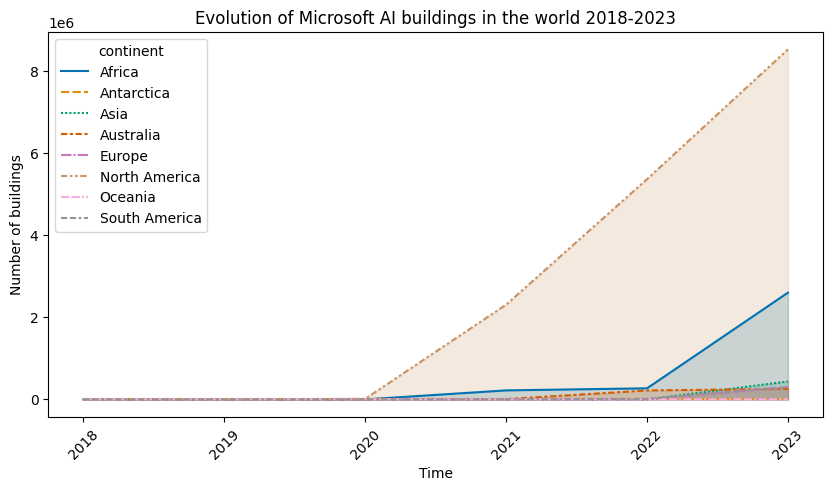

In [73]:
# without dictionary labels

plt.figure(figsize=(10, 5))
plt.title("Evolution of Microsoft AI buildings in the world 2018-2023")

# plot the data
ax = sns.lineplot(x='year', y='num_of_blds', hue='continent', data=df_ai,
                  palette='colorblind',  style='continent',
                  )
# log y axis
# plt.yscale("log")

# rotate x labels
plt.xticks(rotation=45)
# plt.ylim(top=105)

# fill the area under lines
fill_under_lines(ax)

# set x and y axis labels
plt.xlabel("Time")
plt.ylabel("Number of buildings")


In [67]:
df_ai.head()

,feature,source,timestamp,num_of_blds,year,continent,id,total_blds,percentage
6,0,source=microsoft/BuildingFootprints,2018-01-01T00:00:00Z,0.0,2018,Africa,0,0.0,NaN
7,0,source=microsoft/BuildingFootprints,2019-01-01T00:00:00Z,0.0,2019,Africa,0,0.0,NaN
8,0,source=microsoft/BuildingFootprints,2020-01-01T00:00:00Z,0.0,2020,Africa,0,13935.0,0.000000
9,0,source=microsoft/BuildingFootprints,2021-01-01T00:00:00Z,219212.0,2021,Africa,0,2530556.0,8.662602
10,0,source=microsoft/BuildingFootprints,2022-01-01T00:00:00Z,269849.0,2022,Africa,0,5859157.0,4.605594


Text(0, 0.5, 'Number of buildings')

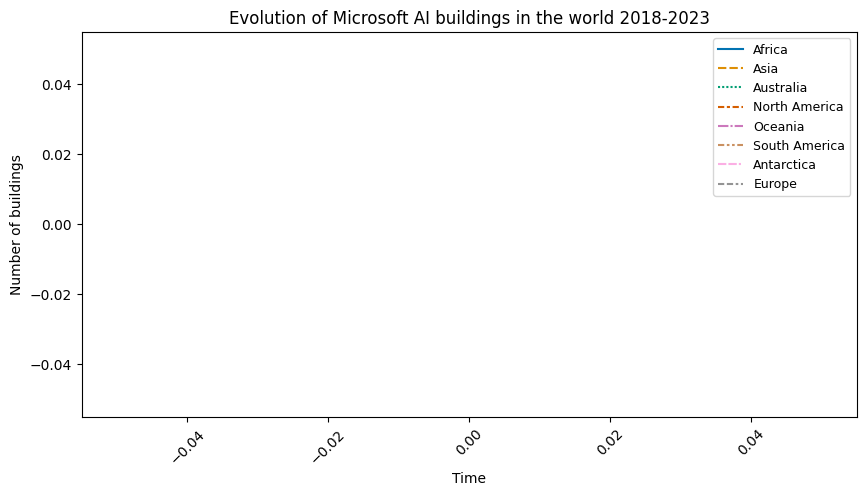

In [72]:
# with dictionary keys

plt.figure(figsize=(10,5))
plt.title("Evolution of Microsoft AI buildings in the world 2018-2023")

# plot the data
ax = sns.lineplot(x='year', y='num_of_blds', hue='continent', data=df_ai,
                  palette='colorblind', style='continent',
             hue_order=labels_dic.keys(),
             style_order=labels_dic.keys())
# log y axis
# plt.yscale("log")

# rotate x labels
plt.xticks(rotation=45)
# plt.ylim(top=105)

# set the legend labels
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, [labels_dic[key] for key in labels_dic.keys()], fontsize=9)

# fill the area under lines
fill_under_lines(ax)

# set x and y axis labels
plt.xlabel("Time")
plt.ylabel("Number of buildings")


In [ ]:
# 100 % area plot try
# plt.stackplot(range(1, 5), df_rem_piv[0], df_rem_piv[1], df_rem_piv[2],
#                 df_rem_piv[3], df_rem_piv[4], df_rem_piv[5], df_rem_piv[6], df_rem_piv[7])
# plt.show()

# df_rem_piv[0], df_rem_piv[1], df_rem_piv[2], df_rem_piv[3], df_rem_piv[4], df_rem_piv[5], df_rem_piv[6], df_rem_piv[7]


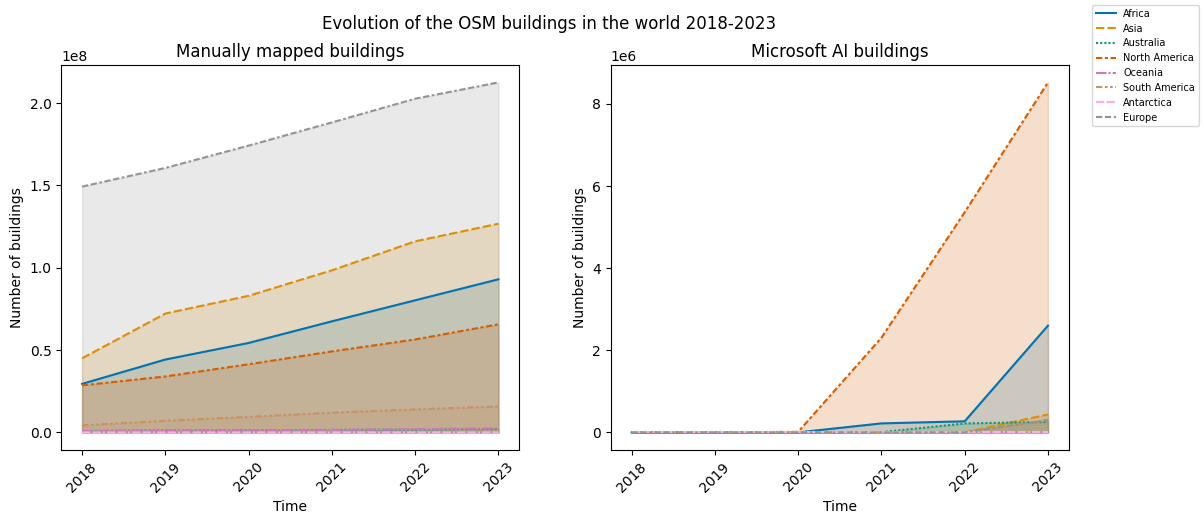

In [75]:
# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 5))
fig.suptitle("Evolution of the OSM buildings in the world 2018-2023")

# create a Seaborn plot on the first subplot
sns.lineplot(x='year', y='num_of_blds', hue='feature', data=df_rem, ax=ax1,
             palette='colorblind', style='feature',
             hue_order=labels_dic.keys(),
             style_order=labels_dic.keys())

# create another Seaborn plot on the second subplot
sns.lineplot(x='year', y='num_of_blds', hue='feature', data=df_ai, ax=ax2,
             palette='colorblind', style='feature',
             hue_order=labels_dic.keys(),
             style_order=labels_dic.keys())

# set the legend labels
handles, _ = plt.gca().get_legend_handles_labels()
ax2.legend(handles, [labels_dic[key] for key in labels_dic.keys()], fontsize=7)
ax1.legend().remove()
ax2.legend().remove()

# ax1.set_yscale("log")
# ax2.set_yscale("log")

# set titles for each subplot
ax1.set_title("Manually mapped buildings")
ax2.set_title("Microsoft AI buildings")

# set the y axis limit
# ax1.set_ylim(top=105, bottom=-5)
# ax2.set_ylim(top=105, bottom=-5)

# set the y axis label
ax1.set_xlabel("Time")
ax1.set_ylabel("Number of buildings")

# set the x axis label
ax2.set_xlabel("Time")
ax2.set_ylabel("Number of buildings")

# fill the area under lines
fill_under_lines(ax1,ax2)

# rotate x-axis labels for both subplots
for ax in [ax1, ax2]:
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.tick_params(axis='x', labelrotation=45)

fig.legend(handles, [labels_dic[key] for key in labels_dic.keys()], fontsize=7)

plt.show()


In [ ]:
df_rem.head()

,feature,source,timestamp,num_of_blds,continent,id,total_blds,percentage
0,0,remainder,2020-01-01 00:00:00+00:00,54298403.0,Africa,0,364680591.0,14.889304
1,0,remainder,2021-01-01 00:00:00+00:00,67423672.0,Africa,0,418092103.0,16.126512
2,0,remainder,2022-01-01 00:00:00+00:00,80187816.0,Africa,0,472865820.0,16.957837
3,0,remainder,2023-01-01 00:00:00+00:00,92934713.0,Africa,0,517941468.0,17.943092
8,6,remainder,2020-01-01 00:00:00+00:00,774.0,Antarctica,6,364680591.0,0.000212


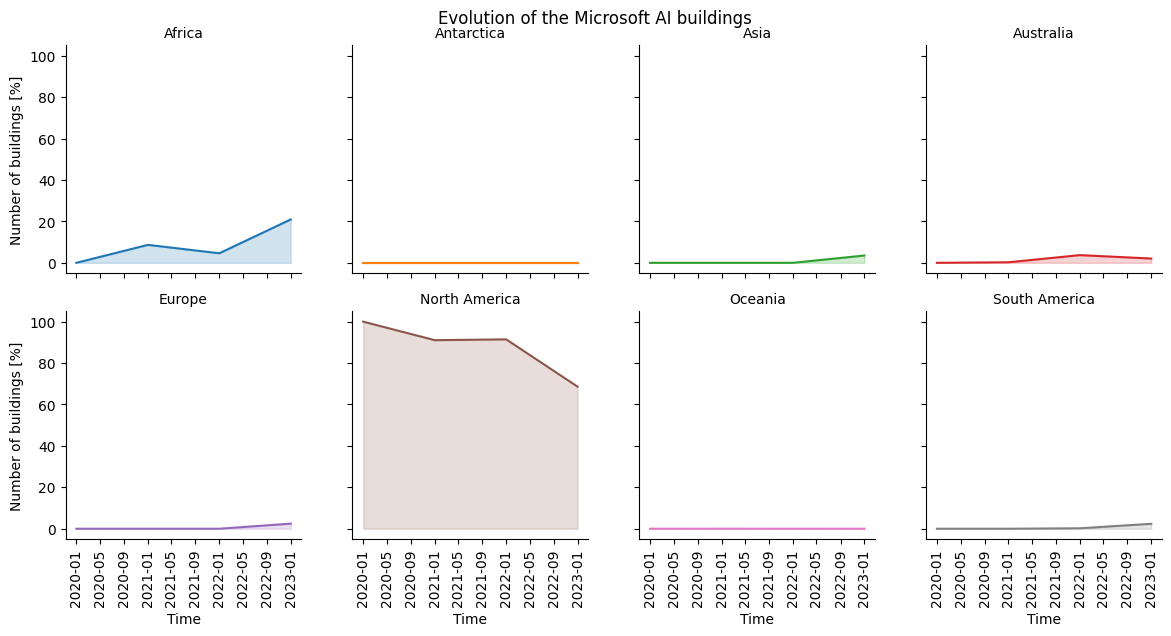

In [ ]:
# Create a grid : initialize it
g = sns.FacetGrid(df_ai, col='continent', hue='continent', col_wrap=4, )

# Add the line over the area with the plot function
g = g.map(plt.plot, 'timestamp', 'percentage')

# Fill the area with fill_between
g = g.map(plt.fill_between, 'timestamp', 'percentage',
          alpha=0.2)  # .set_titles("{col_name}")

[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]

# Set subtitles using the get_subtitle function
g.set_titles("{col_name}")


# Control the title of each facet
# g = g.set_titles("{col_name}")

# Add a title for the whole plot
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Evolution of the Microsoft AI buildings')

axes = g.axes.flatten()


for ax in axes:
    ax.set_xlabel("Time")
    ax.set_ylabel("Number of buildings [%]")
    # ax.set_ylim(100)


# Show the graph
plt.show()


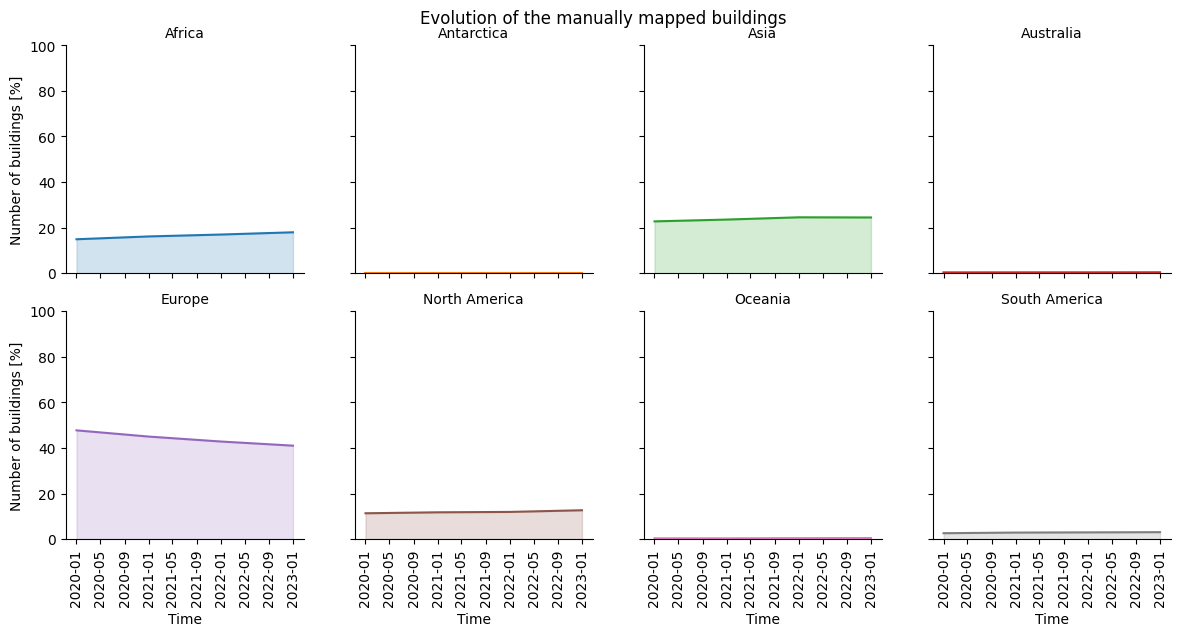

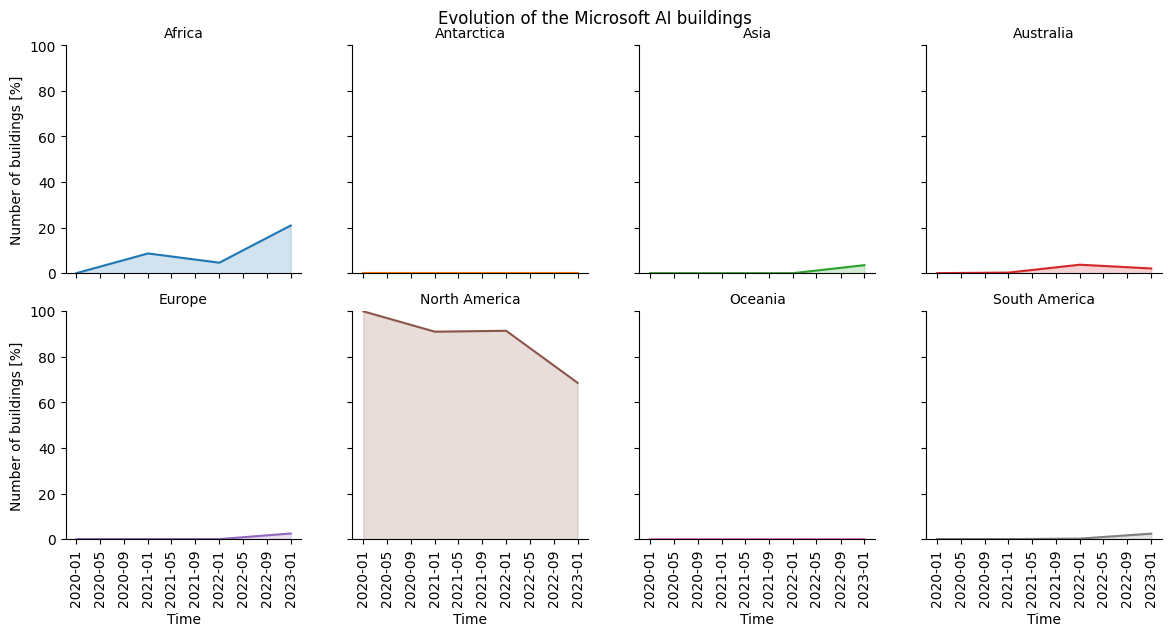

In [ ]:

# Create a grid : initialize it
g = sns.FacetGrid(df_rem, col='continent', hue='continent', col_wrap=4, )

# Add the line over the area with the plot function
g = g.map(plt.plot, 'timestamp', 'percentage')

# Fill the area with fill_between
g = g.map(plt.fill_between, 'timestamp', 'percentage',
          alpha=0.2)#.set_titles("{col_name}")

g.set(ylim=(0, 100))

[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]

# Set subtitles using the get_subtitle function
g.set_titles("{col_name}")


# Control the title of each facet
# g = g.set_titles("{col_name}")

# Add a title for the whole plot
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Evolution of the manually mapped buildings')

axes = g.axes.flatten()


for ax in axes:
    ax.set_xlabel("Time")
    ax.set_ylabel("Number of buildings [%]")
    # ax.set_ylim(100)


# Show the graph
plt.show()


# Create a grid : initialize it
g = sns.FacetGrid(df_ai, col='continent', hue='continent', col_wrap=4, )

# Add the line over the area with the plot function
g = g.map(plt.plot, 'timestamp', 'percentage')

# Fill the area with fill_between
g = g.map(plt.fill_between, 'timestamp', 'percentage',
          alpha=0.2)  # .set_titles("{col_name}")

g.set(ylim=(0,100))

[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]

# Set subtitles using the get_subtitle function
g.set_titles("{col_name}")


# Control the title of each facet
# g = g.set_titles("{col_name}")

# Add a title for the whole plot
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Evolution of the Microsoft AI buildings')

axes = g.axes.flatten()


for ax in axes:
    ax.set_xlabel("Time")
    ax.set_ylabel("Number of buildings [%]")


# Show the graph
plt.show()
